# Processing data: deaths and positives

In [ ]:
# %load_ext autoreload
# %autoreload 2

In [ ]:
import pandas as pd

## Deaths

### Read data

In [ ]:
df_deaths_2015 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2015.csv')
df_deaths_2016 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2016.csv')
df_deaths_2017 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2017.csv')
df_deaths_2018 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2018.csv')
df_deaths_2019 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2019.csv')
df_deaths_2020 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2020.csv')
df_deaths_2021 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/deaths_provinces_2021.csv')

### Process data

In [ ]:
df_deaths_2015['year'] = '2015'
df_deaths_2016['year'] = '2016'
df_deaths_2017['year'] = '2017'
df_deaths_2018['year'] = '2018'
df_deaths_2019['year'] = '2019'
df_deaths_2020['year'] = '2020'
df_deaths_2021['year'] = '2021'

In [ ]:
df_deaths = pd.concat([df_deaths_2015, 
            df_deaths_2016, 
            df_deaths_2017, 
            df_deaths_2018, 
            df_deaths_2019, 
            df_deaths_2020, 
            df_deaths_2021], 
            ignore_index=True)

In [ ]:
df_deaths = df_deaths.astype({'mes': 'object'})

### Export data

In [ ]:
df_deaths.to_csv('/work/covid-19-EC-provinces/data/processed/deaths.csv', index=False)

## Positives

### Read data

In [ ]:
df_positives_2020 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/positives_day_provices_2020.csv')
df_positives_2021 = pd.read_csv('/work/covid-19-EC-provinces/data/raw/positives_day_provices_2021.csv')

In [ ]:
df_positives_2020.head()

,provincia,poblacion,total,nuevas,lat,lng,created_at
0,Azuay,881394,0,0,-2.897414,-79.004481,13/03/2020
1,Bolívar,209933,0,0,-1.605556,-79.003056,13/03/2020
2,Carchi,186869,0,0,0.812180,-77.716330,13/03/2020
3,Cañar,281396,0,0,-2.733333,-78.833333,13/03/2020
4,Chimborazo,524004,0,0,-1.674347,-78.648294,13/03/2020


In [ ]:
df_positives_2021.head()

,provincia,poblacion,total,nuevas,lat,lng,created_at
0,Azuay,881394,13605,48,-2.897414,-79.004481,01/01/2021
1,Bolívar,209933,2531,4,-1.605556,-79.003056,01/01/2021
2,Carchi,186869,3667,38,0.812180,-77.716330,01/01/2021
3,Cañar,281396,2849,45,-2.733333,-78.833333,01/01/2021
4,Chimborazo,524004,3260,7,-1.674347,-78.648294,01/01/2021


### Process data

In [ ]:
df_positives_2020.dtypes

provincia      object
poblacion       int64
total           int64
nuevas          int64
lat           float64
lng           float64
created_at     object
dtype: object

In [ ]:
df_positives_2020.created_at = pd.to_datetime(df_positives_2020.created_at, dayfirst=True)

In [ ]:
df_positives_2021.created_at = pd.to_datetime(df_positives_2021.created_at, dayfirst=True)

In [ ]:
df_positives_2021.created_at.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
8395    12
8396    12
8397    12
8398    12
8399    12
Name: created_at, Length: 8400, dtype: int64

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
df_positives = pd.concat([df_positives_2020, df_positives_2021], ignore_index=True)

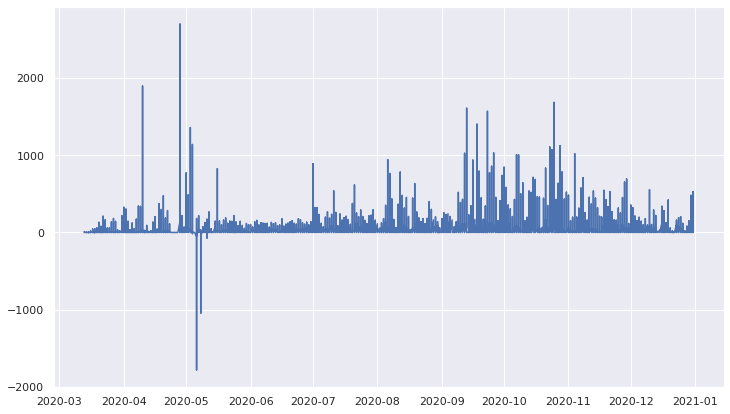

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_positives_2020['created_at'], df_positives_2020['nuevas'])

There're negative values. This must be a mistake, so I transform them into positive ones.

In [ ]:
nuevas_to_replace = df_positives.query('nuevas < 0')['nuevas'].values
nuevas_replaced = nuevas_to_replace * (-1)
df_positives['nuevas'].replace(nuevas_to_replace, nuevas_replaced, inplace=True)

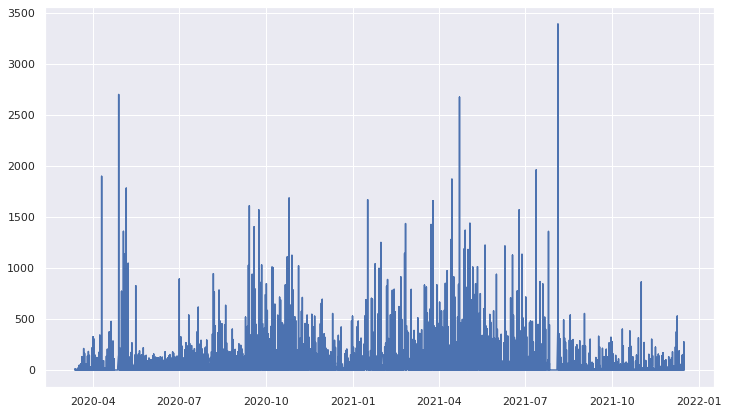

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_positives['created_at'], df_positives['nuevas'])

In [ ]:
df_positives.dtypes

provincia             object
poblacion              int64
total                  int64
nuevas                 int64
lat                  float64
lng                  float64
created_at    datetime64[ns]
dtype: object

In [ ]:
df_positives.set_index('created_at', inplace=True)

### Export data

In [ ]:
df_positives.to_csv('/work/covid-19-EC-provinces/data/processed/positives.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7294ef23-3287-47ac-a12f-ba892bffdf3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>